# Complementaria métodos computacionales 1
> Semana 02

***

# 1) Python no tan básico

La idea de este ejercicio es familiarizarse con la notación de objetos y de loops de Python.

Usaremos el objeto `date(año,mes,día)` que representa una fecha, y el objeto `timedelta(days=n)` que representa un cambio de fecha de `n` días. 

Estos objetos se pueden sumar para cambiar la fecha, de la siguiente manera:

In [1]:
from datetime import date, timedelta

date(2024,8,13) + timedelta(7)

datetime.date(2024, 8, 20)

También puede comparar si una fecha sucede antes que otra así:

In [2]:
date(2024,8,11) < date(2024,8,13)

True

In [3]:
date(2024,8,11) < date(2024,8,13) < date(2024,8,16)

True

## 1.a) Semanas del semestre

Escriba una función llamada `semanas_semestre(fecha_inicio,fechas_receso)` que reciba como argumentos:
* `fecha_inicio`: un datetime con la fecha de inicio de clases
* `fechas_receso`: una tupla o lista con dos elementos, la fecha de inicio de la semana de receso y la fecha final.

**La función debe retornar una lista con las fechas de las 16 semanas del semestre, excluyendo aquella semana de receso.**

Este semestre inició en 2024-08-05, y receso es desde 2024-09-30 hasta 2024-10-06

In [8]:
from datetime import datetime, timedelta

def semanas_semestre(fecha_inicio, fechas_receso):
    semanas = []
    current_date = fecha_inicio
    fecha_receso_inicio, fecha_receso_fin = fechas_receso
    
    for _ in range(18):
        if not (fecha_receso_inicio <= current_date <= fecha_receso_fin):
            semanas.append(current_date)
        else:
            current_date = fecha_receso_fin + timedelta(days=1)
            semanas.append(current_date)
        
        current_date += timedelta(weeks=1)
    
    return semanas

fecha_inicio = datetime(2024, 8, 5)
fechas_receso = (datetime(2024, 9, 30), datetime(2024, 10, 6))
semanas = semanas_semestre(fecha_inicio, fechas_receso)
print(*semanas,sep="\n")


2024-08-05 00:00:00
2024-08-12 00:00:00
2024-08-19 00:00:00
2024-08-26 00:00:00
2024-09-02 00:00:00
2024-09-09 00:00:00
2024-09-16 00:00:00
2024-09-23 00:00:00
2024-10-07 00:00:00
2024-10-14 00:00:00
2024-10-21 00:00:00
2024-10-28 00:00:00
2024-11-04 00:00:00
2024-11-11 00:00:00
2024-11-18 00:00:00
2024-11-25 00:00:00
2024-12-02 00:00:00
2024-12-09 00:00:00


## 1.b) Festivos

¿Qué pasa con los festivos? Agregue un argumento ocpional a su función `semanas_semestre(fecha_inicio,fechas_receso,festivos=[])` que también excluya la clase de esa semana si cae precisamente en la fecha del festivo.

In [16]:
from datetime import datetime, timedelta

def semanas_semestre(fecha_inicio, fechas_receso, festivos=[]):
    semanas = []
    current_date = fecha_inicio
    fecha_receso_inicio, fecha_receso_fin = fechas_receso
    
    for _ in range(18):
        if not (fecha_receso_inicio <= current_date <= fecha_receso_fin) and current_date not in festivos:
            semanas.append(current_date)
        else:
            if fecha_receso_inicio <= current_date <= fecha_receso_fin:
                current_date = fecha_receso_fin + timedelta(days=1)
            elif current_date in festivos:
                current_date += timedelta(weeks=1)
            semanas.append(current_date)
        
        current_date += timedelta(weeks=1)
    
    return semanas

fecha_inicio = datetime(2024, 8, 5)
fechas_receso = (datetime(2024, 9, 30), datetime(2024, 10, 6))
festivos = [datetime(2024, 8, 19), datetime(2024, 11, 20)]

semanas = semanas_semestre(fecha_inicio, fechas_receso, festivos)
print(*semanas, sep="\n")


2024-08-05 00:00:00
2024-08-12 00:00:00
2024-08-26 00:00:00
2024-09-02 00:00:00
2024-09-09 00:00:00
2024-09-16 00:00:00
2024-09-23 00:00:00
2024-10-07 00:00:00
2024-10-14 00:00:00
2024-10-21 00:00:00
2024-10-28 00:00:00
2024-11-04 00:00:00
2024-11-11 00:00:00
2024-11-18 00:00:00
2024-11-25 00:00:00
2024-12-02 00:00:00
2024-12-09 00:00:00
2024-12-16 00:00:00


# 2) ordenar y graficar

La siguiente celda tiene código para generar datos de prueba para este problema. No modifique este código ni sobrescriba las variables `X` ni `Y`

In [25]:
import random
from math import sin
import matplotlib.pyplot as plt
N = 200
X = [random.uniform(0,15) for i in range(N)]
Y = [sin(x)+random.normalvariate(0.,0.05) for x in X] 

ModuleNotFoundError: No module named 'matplotlib'

Si intentamos graficar esto como una línea, la cosa sale bastante mal:

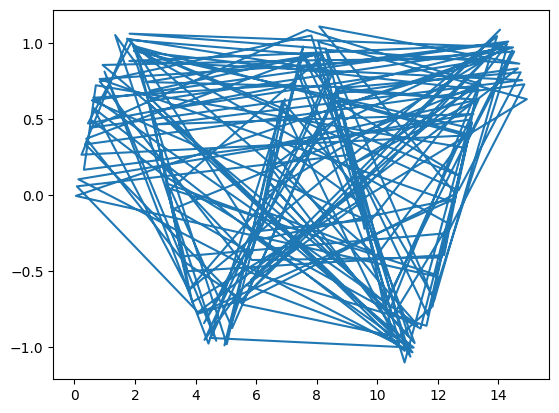

In [21]:
plt.plot(X,Y)

Esto se debe a que los datos están desordenados en `X`. 
No basta con ordenarlos simplemente, ya que `X` y `Y` tienen una relación que se perdería si ordeno solamente `X`. 

Cree una función `ordenar_juntos(x,y)` que ordene `x` y aplique este mismo ordenamiento a `y`. 

**La función debe retornar `x2, y2`, las listas ordenadas.**

Grafique las listas ordenadas (de la misma manera que antes, usando `plt.plot`, no scatter) y note la diferencia.

> Nota: Por ahora no es válido usar la función `numpy.argsort`, porque la idea es practicar Python base.
>
> Otra nota: su código debe funcionar para otro par de listas, no necesariamente `X` y `Y`, y no necesariamente de tamaño `N`
>
> Pista: puede usar el argumento opcional `key` de la función `sorted`.

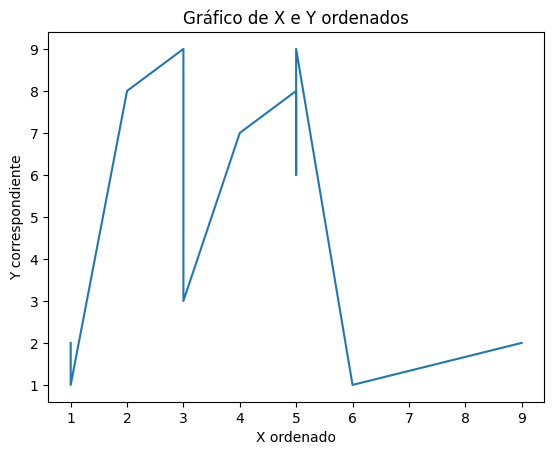

In [29]:
def ordenar_juntos(x, y):
    n = len(x)
    for i in range(n):
        for j in range(0, n-i-1):
            if x[j] > x[j+1]:
                # Intercambiar en x
                x[j], x[j+1] = x[j+1], x[j]
                # Intercambiar el correspondiente en y
                y[j], y[j+1] = y[j+1], y[j]
    
    return x, y

X = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
Y = [9, 2, 7, 1, 8, 2, 8, 1, 6, 3, 9]

X_ordenado, Y_ordenado = ordenar_juntos(X, Y)

# Graficar las listas ordenadas
import matplotlib.pyplot as plt

plt.plot(X_ordenado, Y_ordenado)
plt.title('Gráfico de X e Y ordenados')
plt.xlabel('X ordenado')
plt.ylabel('Y correspondiente')
plt.show()
